<a href="https://colab.research.google.com/github/sofiadellarosa/FinalProjectDS/blob/main/DSproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#import github stuff
%cd /content
!git clone https://github.com/sofiadellarosa/FinalProjectDS.git
#%cd /content/drive/MyDrive/project_files

/content
fatal: destination path 'FinalProjectDS' already exists and is not an empty directory.


In [3]:
import pandas as pd
import numpy as np
import re
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [1]:
%cd /content/FinalProjectDS
!unzip hpi_at_bdl_zip5.csv.zip
!unzip DisasterDeclarationsSummaries.csv.zip

/content/FinalProjectDS
Archive:  hpi_at_bdl_zip5.csv.zip
replace hpi_at_bdl_zip5.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._hpi_at_bdl_zip5.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
Archive:  DisasterDeclarationsSummaries.csv.zip
replace DisasterDeclarationsSummaries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n
replace __MACOSX/._DisasterDeclarationsSummaries.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: n


In [4]:
disasterDeclaration_df = pd.read_csv('/content/FinalProjectDS/DisasterDeclarationsSummaries.csv') # FEMA’s Disaster Declarations Summaries
hpi_df = pd.read_csv('/content/FinalProjectDS/hpi_at_bdl_zip5.csv') #Federal Housing Finance Agency's Annual House Price Indexes

<ipython-input-4-fdc600f19364>:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  disasterDeclaration_df = pd.read_csv('/content/FinalProjectDS/DisasterDeclarationsSummaries.csv') # FEMA’s Disaster Declarations Summaries
<ipython-input-4-fdc600f19364>:2: DtypeWarning: Columns (0,1) have mixed types. Specify dtype option on import or set low_memory=False.
  hpi_df = pd.read_csv('/content/FinalProjectDS/hpi_at_bdl_zip5.csv') #Federal Housing Finance Agency's Annual House Price Indexes


# Housing Market Change after Natural Disaster

**Team Members:** Brandon Butler and Sofia Della Rosa

## Project Description:

For this project we will analyze how certain natural disasters in different regions impact the housing market in the United States. We can use that information to see if property values decline after disasters and how quickly they recover. The natural disasters we will be looking at are: hurricanes, earthquake, drought, fire, flood, and tornadoes.


##Collaboration Plan:

For this project, we have a collaboration plan to make sure we have efficient workflow and collaboration. We meet in person every Wednesday to work on the project together. We communicate through text messages. We also use a shared Google Calendar to set up meetings and keep track of deadlines. We also set up a shared Google Drive where we store project documents and files. Inside the Google Drive is a To-Do Note file that we use to track our project tasks. Lastly, we made a GitHub repository to manage and coordinate our code efficiently.




##Table 1:

The first dataset we are working with is the Federal Housing Finance Agency's Annual House Price Indexes. This dataset contains House Price Index (HPI) data at the state and zip code levels. We chose this dataset because it provides a reliable measure of housing market trends over time. This will allow us to analyze how property values change in response to natural disasters and then track their recovery rates. A question we have for this dataset is how do house prices change in the years following a natural disaster? Another question is how long does it take for them to return to pre-disaster levels?

Small amount of ETL including 3-5 interesting stats
One graph


In [5]:
# ONLY RUN THIS ONCE
# hpi_df.reset_index(drop=True, inplace=True)
# col 1: Five-Digit ZIP Code
# col 2: Year
# col 3: Annual Change (%)
# col 4: HPI
# Col 5: HPI with 1990 base
# col 6: HPI with 2000 base

hpi_df = hpi_df.iloc[5:].reset_index(drop=True) # Drop the first 5 rows (index 0 to 4), which contain metadata or unwanted information
hpi_df.columns = hpi_df.iloc[0] # Set the 5th row (now at index 0) as the column headers

hpi_df = hpi_df.drop(index=0) # Drop the first row since it is now used as the header

hpi_df = hpi_df.reset_index(drop=True) # Reset the index to ensure it starts from 0

#hpi_df.head()


,Five-Digit ZIP Code,Year,Annual Change (%),HPI,HPI with 1990 base,HPI with 2000 base,NaN,NaN
0,01001,1984,.,100.00,52.27,51.34,NaN,NaN
1,01001,1985,15.86,115.86,60.56,59.49,NaN,NaN
2,01001,1986,16.22,134.66,70.38,69.14,NaN,NaN
3,01001,1987,21.66,163.83,85.63,84.12,NaN,NaN
4,01001,1988,16.99,191.66,100.18,98.41,NaN,NaN


Put the description here

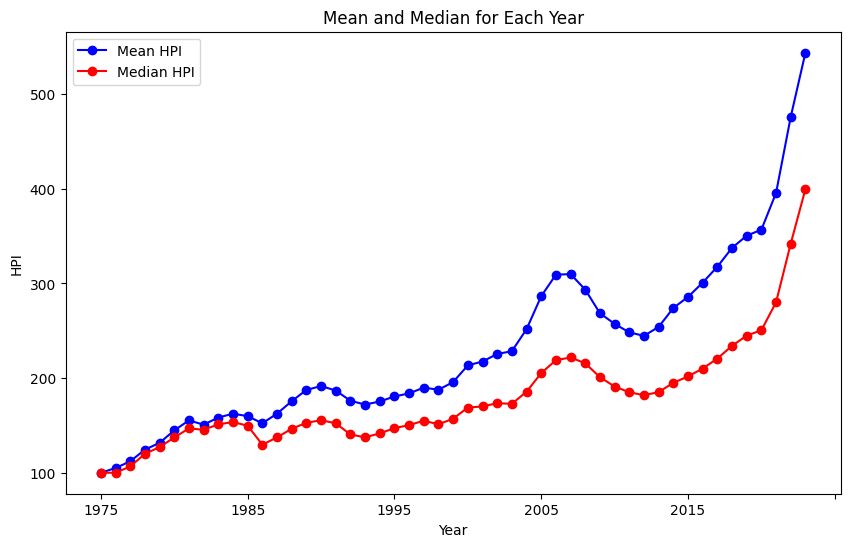

In [20]:
mean_per_year = hpi_df.groupby('Year')['HPI'].mean()
ax = mean_per_year.plot(kind='line', marker='o', color='blue', figsize=(10, 6), label='Mean HPI')

median_per_year = hpi_df.groupby('Year')['HPI'].median()
median_per_year.plot(kind='line', marker='o', color='red', ax=ax, label='Median HPI')



# Title and labels
ax.set_title('Mean and Median for Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('HPI')

# Title and labels
#ax.set_title('Mean HPI for Each Year')
ax.set_xlabel('Year')
ax.set_ylabel('HPI')

ax.legend()

# hpi_df['Year'] = hpi_df['Year'].astype(str)
# hpi_df['HPI'] = pd.to_numeric(hpi_df['HPI'], errors='coerce') # Convert 'HPI' column to numeric, handling errors
# hpi_df.plot.scatter(x='Year', y='HPI', figsize=(10, 6))

In [26]:
# Some interesting Stats
most_common_zip = hpi_df['Five-Digit ZIP Code'].mode()[0] #01106
most_common_year = hpi_df['Year'].mode()[0] #2021
#print(most_common_year)

<ipython-input-26-5d215d8eaaac>:2: UserWarning: Unable to sort modes: '<' not supported between instances of 'int' and 'str'
  most_common_zip = hpi_df['Five-Digit ZIP Code'].mode()[0] #01106


The most common Zip code is 01106 --> Make a bar chart for the different zip codes, maybe by region?
The most frequent year reported in the data is 2021 --> do the same and make a bar chart or histogram for this information


## Table 2:
The next dataset we are working with is FEMA’s Disaster Declarations Summaries. This dataset lists all federally declared disasters with relevant attributes such as date, type, and duration. We chose this dataset because it provides detailed records of natural disasters. This will allow us to identify when and where disasters occurred and then analyze their impact on housing markets in affected regions. A question we have for this dataset is what types of natural disasters have the most significant and longest impact on housing prices in affected areas?

Small amount of ETL including 3-5 interesting stats One Graph

In [ ]:
disasterDeclaration_df.head()

,femaDeclarationString,disasterNumber,state,declarationType,declarationDate,fyDeclared,incidentType,declarationTitle,ihProgramDeclared,iaProgramDeclared,paProgramDeclared,hmProgramDeclared,incidentBeginDate,incidentEndDate,disasterCloseoutDate,tribalRequest,fipsStateCode,fipsCountyCode,placeCode,designatedArea,declarationRequestNumber,lastIAFilingDate,incidentId,region,designatedIncidentTypes,lastRefresh,hash,id
0,FM-5529-OR,5529,OR,FM,2024-08-09T00:00:00.000Z,2024,Fire,LEE FALLS FIRE,0,0,1,1,2024-08-08T00:00:00.000Z,NaN,NaN,0,41,67,99067,Washington (County),24122,NaN,2024081001,10,R,2024-08-27T18:22:14.800Z,ae87cf3c6ed795015b714af7166c7c295b2b67c7,09e3f81a-5e16-4b72-b317-1c64e0cfa59c
1,FM-5528-OR,5528,OR,FM,2024-08-06T00:00:00.000Z,2024,Fire,ELK LANE FIRE,0,0,1,1,2024-08-04T00:00:00.000Z,NaN,NaN,0,41,31,99031,Jefferson (County),24116,NaN,2024080701,10,R,2024-08-27T18:22:14.800Z,432cf0995c47e3895cea696ede5621b810460501,59983f89-30bf-4888-b21b-62e8d57d9aac
2,FM-5527-OR,5527,OR,FM,2024-08-02T00:00:00.000Z,2024,Fire,MILE MARKER 132 FIRE,0,0,1,1,2024-08-02T00:00:00.000Z,NaN,NaN,0,41,17,99017,Deschutes (County),24111,NaN,2024080301,10,R,2024-08-27T18:22:14.800Z,2f21d90cb6bc64b0d4121aa3f18d852bbb4b11fa,8d13ecf0-bc2f-496b-8c9f-b2e73da832a0
3,FM-5521-WA,5521,WA,FM,2024-07-26T00:00:00.000Z,2024,Fire,RETREAT FIRE,0,0,1,1,2024-07-23T00:00:00.000Z,NaN,NaN,0,53,77,99077,Yakima (County),24098,NaN,2024072601,10,R,2024-08-27T18:22:14.800Z,e205f5a4b56cadd811661c07fc8a8143b6c8c604,bc02a243-2458-4af3-84e3-b9928bd1d41d
4,FM-5520-ID,5520,ID,FM,2024-07-26T00:00:00.000Z,2024,Fire,GWEN FIRE,0,0,1,1,2024-07-25T00:00:00.000Z,NaN,NaN,0,16,0,57340,Nez Perce Indian Reservation,24099,NaN,2024072602,10,R,2024-08-27T18:22:14.800Z,ba084caa4ee18c9c0c4383346e7669d4af4ab9b7,85cccdec-5e22-436f-a3e7-acd7340172cf


In [ ]:
# Drop unnecessary columns
disasterDeclaration_df.drop(columns=[
    "femaDeclarationString", "disasterNumber", "ihProgramDeclared", "iaProgramDeclared",
    "paProgramDeclared", "hmProgramDeclared", "placeCode", "declarationRequestNumber",
    "lastIAFilingDate", "designatedIncidentTypes", "lastRefresh", "hash", "id",
    "tribalRequest", "fipsStateCode", "fipsCountyCode"
], inplace=True, errors="ignore")

# Reset the index after dropping columns
disasterDeclaration_df = disasterDeclaration_df.reset_index(drop=True)

# Rename columns for consistency
disasterDeclaration_df = disasterDeclaration_df.rename(columns={
    "state": "State",
    "declarationDate": "Declaration Date",
    "fyDeclared": "Fiscal Year Declared",
    "incidentType": "Incident Type",
    "declarationTitle": "Declaration Title",
    "incidentBeginDate": "Incident Begin Date",
    "incidentEndDate": "Incident End Date",
    "designatedArea": "Designated Area"
})

# Function to clean and standardize the Designated Area column
def clean_designated_area(entry):
    if pd.isna(entry):
        return entry
    return entry.lower().replace(" (county)", "").strip()

disasterDeclaration_df['Designated Area'] = disasterDeclaration_df['Designated Area'].apply(clean_designated_area)

# Function to replace empty or invalid values with NaN
def replace_empty_with_nan(entry):
    entry = str(entry).strip()
    if entry in ["–", '="0"', '="0.00"', "", "nan"]:
        return np.nan
    return entry

# Apply NaN replacement to all columns
for col in disasterDeclaration_df.columns:
    disasterDeclaration_df[col] = disasterDeclaration_df[col].apply(replace_empty_with_nan)

# Convert specific columns to float where applicable
float_columns = ["Fiscal Year Declared"]
for col in float_columns:
    disasterDeclaration_df[col] = pd.to_numeric(disasterDeclaration_df[col], errors='coerce')

# Drop all rows containing NaN values
disasterDeclaration_df.dropna(inplace=True)

# Reset the index after dropping NaN rows
disasterDeclaration_df = disasterDeclaration_df.reset_index(drop=True)

# Save the cleaned dataset without NaN rows to a new CSV file
disasterDeclaration_df.to_csv("Cleaned_DisasterDeclarations_NoNaN.csv", index=False)

# Print first few rows to confirm
disasterDeclaration_df.head()

,State,declarationType,Declaration Date,Fiscal Year Declared,Incident Type,Declaration Title,Incident Begin Date,Incident End Date,disasterCloseoutDate,Designated Area,incidentId,region
0,NM,FM,2022-04-30T00:00:00.000Z,2022,Fire,CALF CANYON FIRE,2022-04-20T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,san miguel,2022050101,6
1,NM,FM,2022-04-28T00:00:00.000Z,2022,Fire,COOK'S PEAK FIRE,2022-04-28T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,colfax,2022042901,6
2,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,NOGAL CANYON FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,lincoln,2022041303,6
3,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,MCBRIDE FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-25T00:00:00.000Z,lincoln,2022041302,6
4,NM,FM,2022-04-12T00:00:00.000Z,2022,Fire,HERMIT'S PEAK FIRE,2022-04-12T00:00:00.000Z,2022-07-23T00:00:00.000Z,2024-06-20T00:00:00.000Z,san miguel,2022041301,6


Project Goals:

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# # np="/content/drive/MyDrive/project_files/DSproject.ipynb"
# # print(np)

# %%shell
# jupyter nbconvert --to html "/content/drive/MyDrive/project_files/DSproject.ipynb"